Análisis de Datos de Energía de Brasil

 Buscarás patrones en datos de consumo y mercado eléctrico, con la posibilidad de optimizar el consumo o incluso "alimentar" un centro de datos con energía barata. Se proporcionan conjuntos de datos de Brasil, con la opción de añadir otros.

# 1. Importamos las librerias necesarias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline  


In [15]:
# Configuración básica
plt.style.use('default')  # Usamos el estilo default por ahora


# Configuración de visualización

In [ ]:
# 2. Configuración básica de visualización
plt.style.use('seaborn')  # Usamos estilo básico de seaborn
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# 2. CARGA DE DATOS

In [4]:
print("=== CARGA Y VISTA INICIAL DE DATOS ===")
energy_brasil = pd.read_excel('../datos/energy_brasil.xlsx')
print("\nPrimeras 5 filas del dataset:")
print(energy_brasil.head())

=== CARGA Y VISTA INICIAL DE DATOS ===

Primeras 5 filas del dataset:
       Data TipoConsumidor                 Sistema  UF Setor Econômico - N1  \
0  20140101         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
1  20140201         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
2  20140301         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
3  20140401         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
4  20140501         Cativo  Sudeste / Centro-Oeste  RO          Residencial   

                 Setor Econômico - N2 Setor Econômico - N3 Tipo Tensão - N1  \
0  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
1  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
2  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
3  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
4  Convencional (Excepto Baixa Renda)                TOTAL  

Descripción de los Datos

El dataset contiene información sobre el consumo de energía en Brasil con las siguientes columnas:
- Data: Fecha en formato YYYYMMDD.
- TipoConsumidor: Tipo de consumidor (en este caso 'Cativo').
- Sistema: Región del sistema eléctrico (Sudeste/Centro-Oeste).
- UF: Estado brasileño (RO = Rondônia).
- Setor Econômico: Sector económico en diferentes niveles (N1, N2, N3).
- Tipo Tensão: Tipo de tensión eléctrica en diferentes niveles.
- Faixa de Consumo: Rango de consumo.
- Consumidores: Número de consumidores.
- Consumo: Cantidad de energía consumida.

Los datos mostrados corresponden a consumo residencial de alta tensión en la región Sudeste/Centro-Oeste, específicamente en el estado de Rondônia, con mediciones mensuales desde enero de 2014.

# 3. EXPLORACIÓN INICIAL Y LIMPIEZA

In [6]:
print("\n=== INFORMACIÓN DEL DATASET ===")
print(energy_brasil.info())


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285499 entries, 0 to 285498
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data                  285499 non-null  int64  
 1   TipoConsumidor        285499 non-null  object 
 2   Sistema               285499 non-null  object 
 3   UF                    285499 non-null  object 
 4   Setor Econômico - N1  285499 non-null  object 
 5   Setor Econômico - N2  285499 non-null  object 
 6   Setor Econômico - N3  285499 non-null  object 
 7   Tipo Tensão - N1      285499 non-null  object 
 8   Tipo Tensão - N2      285499 non-null  object 
 9   Tipo Tensão - N3      285499 non-null  object 
 10  Faixa de Consumo N1   285499 non-null  object 
 11  Faixa de Consumo N2   285499 non-null  object 
 12  Consumidores          281511 non-null  float64
 13  Consumo               275799 non-null  float64
dtypes: float64(2), int6

Resumen del Dataset

 - Tamaño: 285,499 filas
 - Columnas: 14 en total

Tipos de Datos

 - Numéricos:
 - 1 columna tipo int64 (Data)
 - 2 columnas tipo float64 (Consumidores y Consumo).

Categóricos:

 - 11 columnas tipo object (texto).

Valores Nulos:

 - Consumidores: 3,988 valores nulos.
 - Consumo: 9,700 valores nulos.
 - Resto de columnas: Completas (sin valores nulos).
 
Uso de Memoria:

 - Aproximadamente 30.5 MB.

# Verificación de valores nulos

In [6]:
print("\nValores nulos por columna:")
print(energy_brasil.isnull().sum())


Valores nulos por columna:
Data                       0
TipoConsumidor             0
Sistema                    0
UF                         0
Setor Econômico - N1       0
Setor Econômico - N2       0
Setor Econômico - N3       0
Tipo Tensão - N1           0
Tipo Tensão - N2           0
Tipo Tensão - N3           0
Faixa de Consumo N1        0
Faixa de Consumo N2        0
Consumidores            3988
Consumo                 9700
dtype: int64


Resumen de Valores Nulos por Columna

La mayoría de las columnas están completas (0 nulos), excepto:
- Consumidores: 3,988 valores faltantes.
- Consumo: 9,700 valores faltantes.

Este análisis es importante porque muestra que solo las variables numéricas principales (Consumidores y Consumo) tienen datos faltantes, mientras que todas las columnas categóricas están completas.

# Conversión de tipos de datos

In [25]:
#1. Fechas:
energy_brasil['Data'] = pd.to_datetime(energy_brasil['Data'], format='%Y%m%d')

Convierte la columna 'Data' de números a formato fecha.

# Creación de características temporales

In [22]:
# 2. Crear columnas temporales
energy_brasil['año'] = energy_brasil['Data'].dt.year
energy_brasil['mes'] = energy_brasil['Data'].dt.month
energy_brasil['dia_semana'] = energy_brasil['Data'].dt.dayofweek


In [24]:
# 3. Convertir columnas numéricas (asegurando tipo correcto)
energy_brasil['Consumidores'] = pd.to_numeric(energy_brasil['Consumidores'], errors='coerce')
energy_brasil['Consumo'] = pd.to_numeric(energy_brasil['Consumo'], errors='coerce')

# Verificar los nuevos tipos de datos
print("\nNuevos tipos de datos:")
print(energy_brasil.dtypes)


Nuevos tipos de datos:
Data                    datetime64[ns]
TipoConsumidor                  object
Sistema                         object
UF                              object
Setor Econômico - N1            object
Setor Econômico - N2            object
Setor Econômico - N3            object
Tipo Tensão - N1                object
Tipo Tensão - N2                object
Tipo Tensão - N3                object
Faixa de Consumo N1             object
Faixa de Consumo N2             object
Consumidores                   float64
Consumo                        float64
año                              int32
mes                              int32
dia_semana                       int32
dtype: object


Convierte 'Consumidores' y 'Consumo' a números, transformando errores en NaN.

# 4. ANÁLISIS DESCRIPTIVO

In [19]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(energy_brasil.describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===
               Data  Consumidores       Consumo
count  2.854990e+05  2.815110e+05  2.757990e+05
mean   2.018754e+07  3.572126e+04  1.758421e+04
std    2.862986e+04  2.078181e+05  7.510192e+04
min    2.014010e+07 -5.108800e+04 -2.093080e+05
25%    2.016090e+07  9.000000e+00  1.090000e+02
50%    2.019040e+07  1.320000e+02  1.470000e+03
75%    2.021090e+07  3.222000e+03  9.614000e+03
max    2.023120e+07  6.652168e+06  1.850736e+06


Estadísticas Descriptivas del Dataset

Resumen por variable:
1. Data (Fechas):
- Rango: 2014-01 a 2023-12
- Total registros: 285,499
2. Consumidores:
- Promedio: 35,721
- Mínimo: -51,088 (posible error)
- Máximo: 6,652,168
- Mediana: 132
3. Consumo:
- Promedio: 17,584
- Mínimo: -209,308 (posible error)
- Máximo: 1,850,736
- Mediana: 1,470

# 5. VISUALIZACIONES


# 5.1 Visualizamos distribuciones de las principales variables

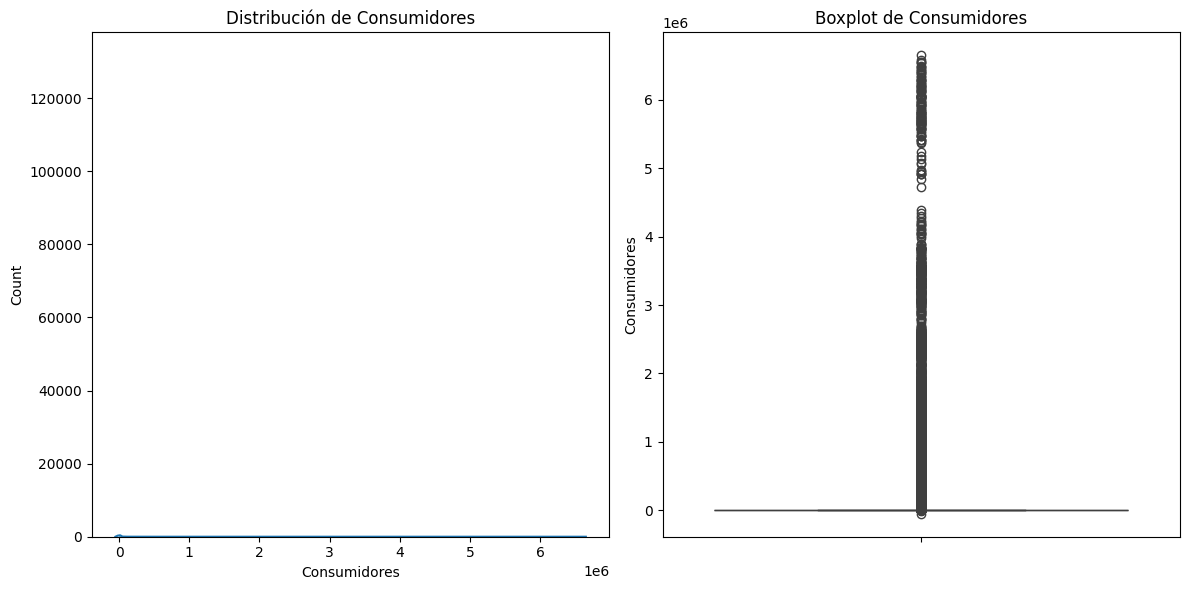

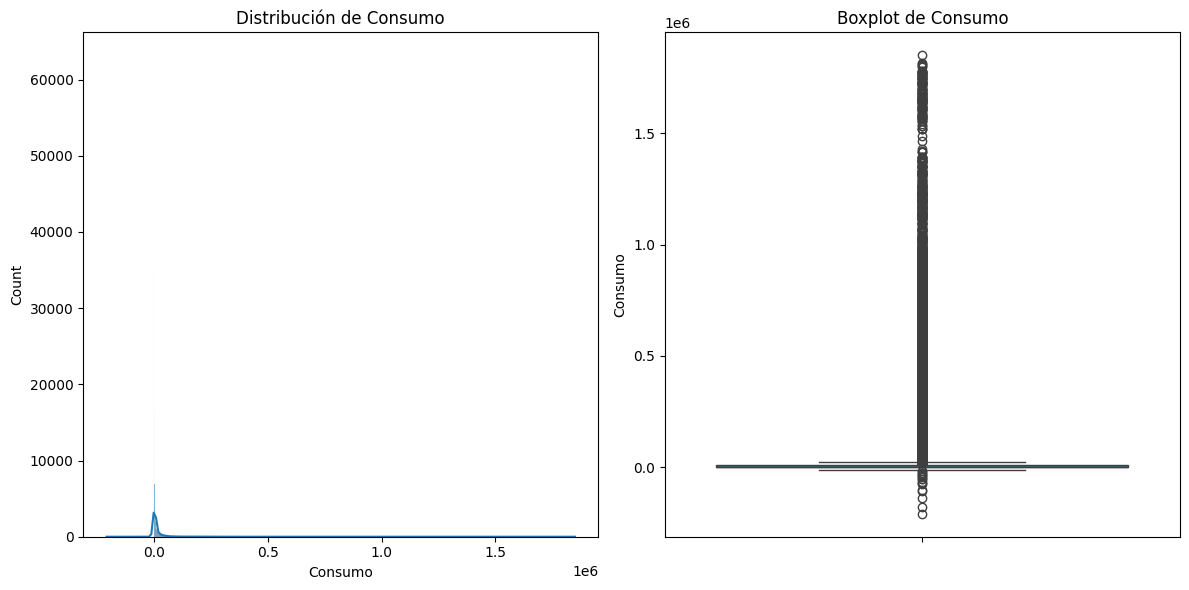

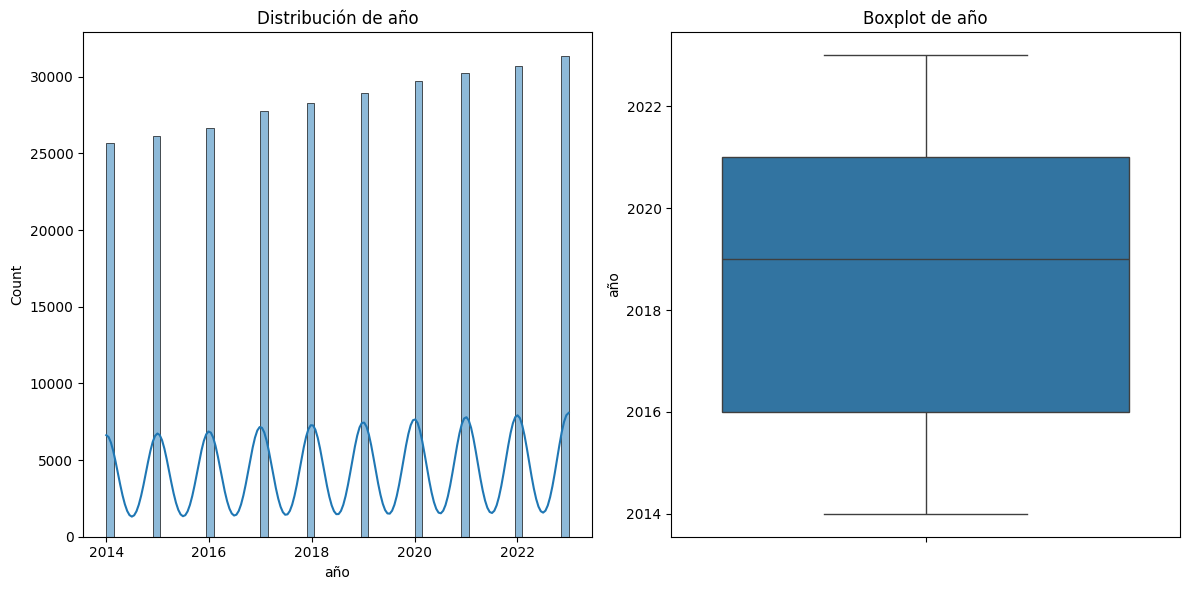

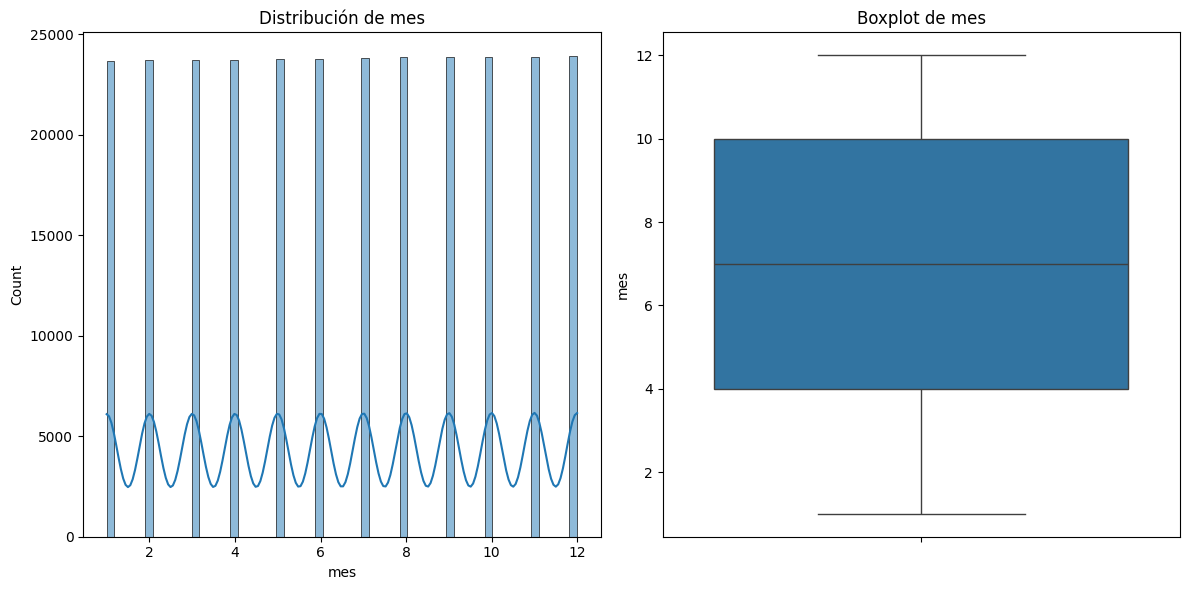

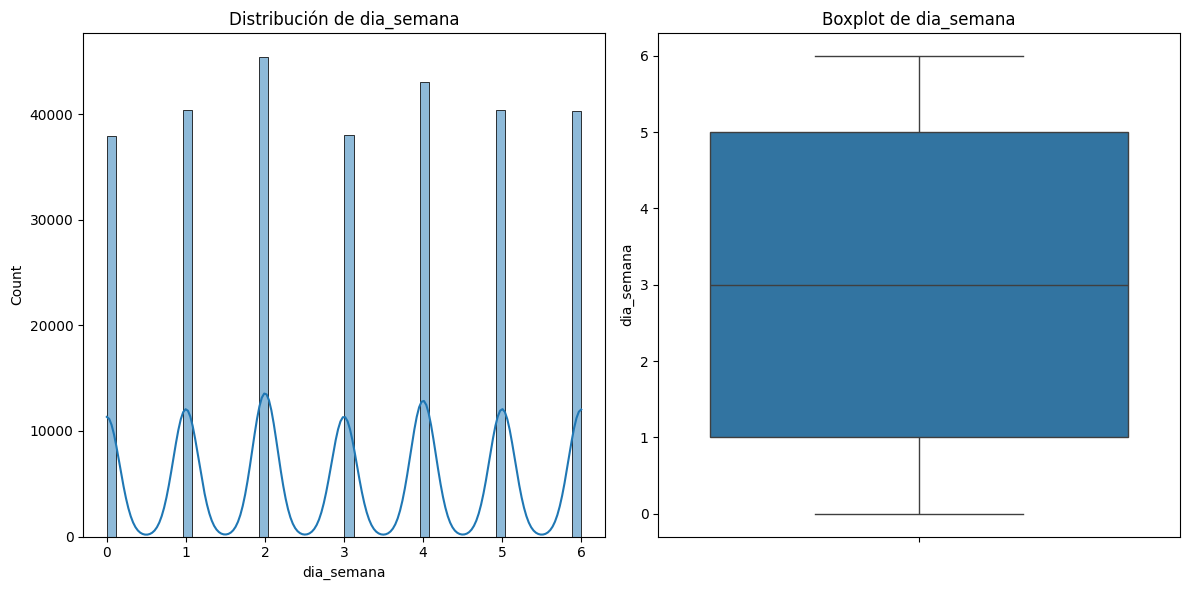

In [31]:
numeric_columns = energy_brasil.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
plot_feature_distribution(energy_brasil, col, col)


Descripción de los Gráficos

1. Consumidores:

 -Distribución muy sesgada.

 -Mayoría de valores concentrados en números bajos.

 -Presencia de valores atípicos altos (hasta 6M).

2. Consumo:

 -Similar a consumidores, distribución sesgada.

 -Alta concentración en valores bajos.

 -Outliers significativos (hasta 1.8M).

3. Año:

 -Datos desde 2014 hasta 2022.

 -Tendencia creciente en el número de registros.

 -Distribución uniforme por año.

4. Mes:

 -Distribución uniforme entre los 12 meses.

 -No hay estacionalidad marcada.

 -Cantidad similar de registros por mes.

5. Día de la semana:

 -Distribución relativamente uniforme (0=Lunes a 6=Domingo).

 -Ligera variación entre días.

 -Sin patrones cíclicos evidentes.

# 5.2 Visualizaciones a lo largo del tiempo

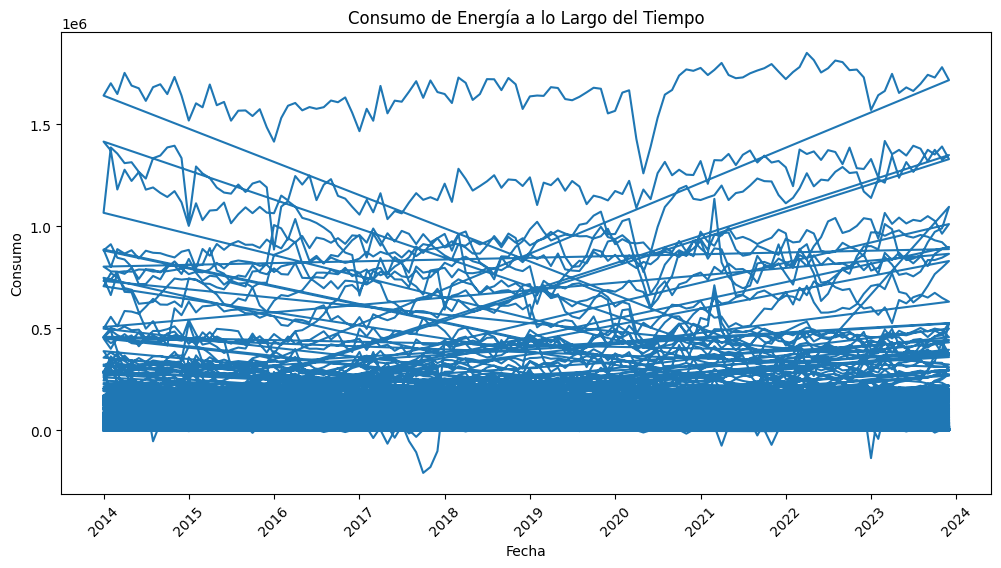

In [43]:
# Gráfico de línea para consumo a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(energy_brasil['Data'], energy_brasil['Consumo'])
plt.title('Consumo de Energía a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.xticks(rotation=45)
plt.show()

# 6. Correlaciones
# 6.1 Análisis de correlaciones

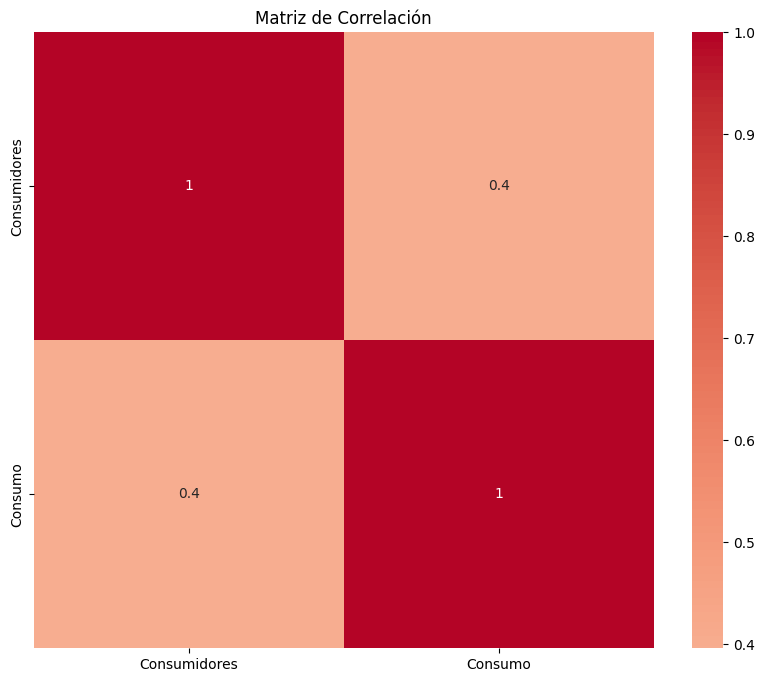

In [35]:
# Seleccionamos solo las columnas numéricas para la correlación
columnas_numericas = energy_brasil.select_dtypes(include=['float64', 'int64']).columns

# Creamos el heatmap solo con las columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(energy_brasil[columnas_numericas].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Matriz de Correlación')
plt.show()

Descripción de la Matriz de Correlación

La matriz muestra la correlación entre las variables 'Consumidores' y 'Consumo':

- Correlación moderada positiva (0.4) entre Consumidores y Consumo.
- Los valores en la diagonal son 1.0 (correlación perfecta de una variable consigo misma).
- La escala de colores va de rojo oscuro (1.0) a rosa claro (0.4).
- Sugiere que a mayor número de consumidores, hay una tendencia moderada a mayor consumo de energía.
- Esta correlación moderada (0.4) indica que existe una relación positiva pero no muy fuerte entre ambas variables.

# 6.2. Análisis temporal

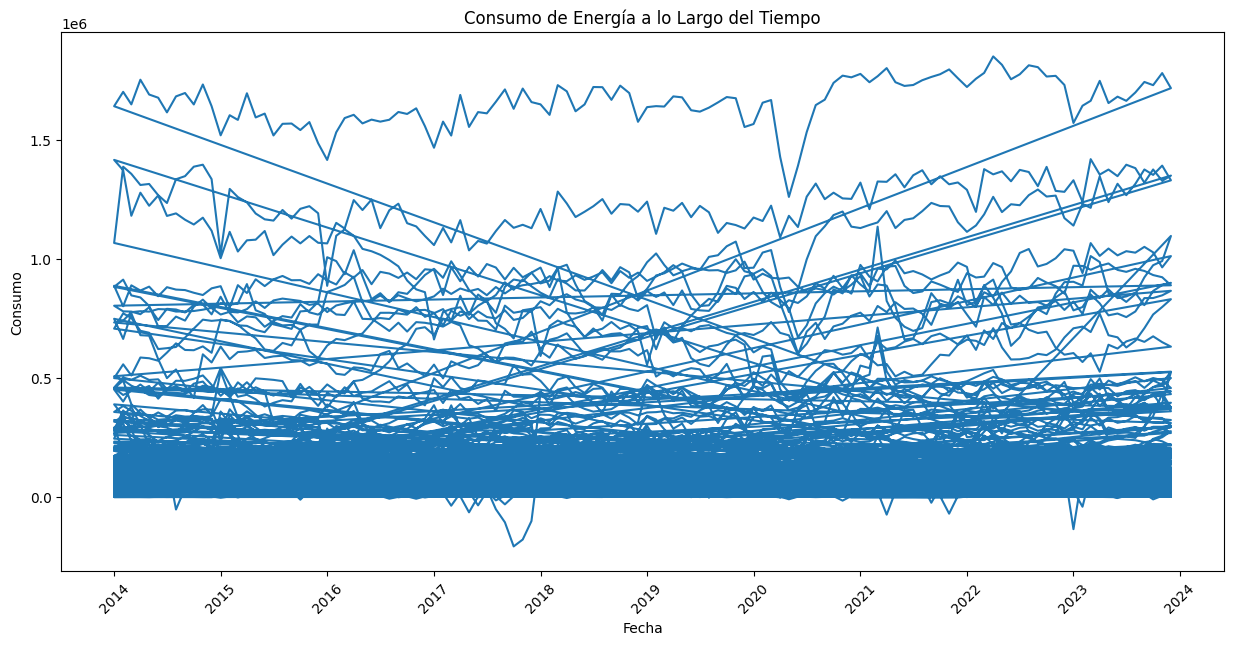

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(energy_brasil['Data'], energy_brasil['Consumo'])  # Nota: usamos 'Data' y 'Consumo' en lugar de 'date' y 'consumption'
plt.title('Consumo de Energía a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.xticks(rotation=45)
plt.show()

Descripción del Gráfico de Consumo Energético (2014-2024)

El gráfico muestra la evolución del consumo de energía a lo largo del tiempo:
- Tendencia general: Ligero aumento en el consumo a lo largo de los años.
- Patrones:
  - Mayor concentración de consumo en valores bajos (parte inferior).
  - Algunos picos de alto consumo (hasta 1.6M).
  - Caída notable en 2020 (posiblemente debido a la pandemia).
- Variabilidad: Alta dispersión en los datos, con múltiples líneas de consumo superpuestas.
- Período: Datos desde 2014 hasta principios de 2024.

# 6.3. Análisis por períodos

Consumo promedio por mes

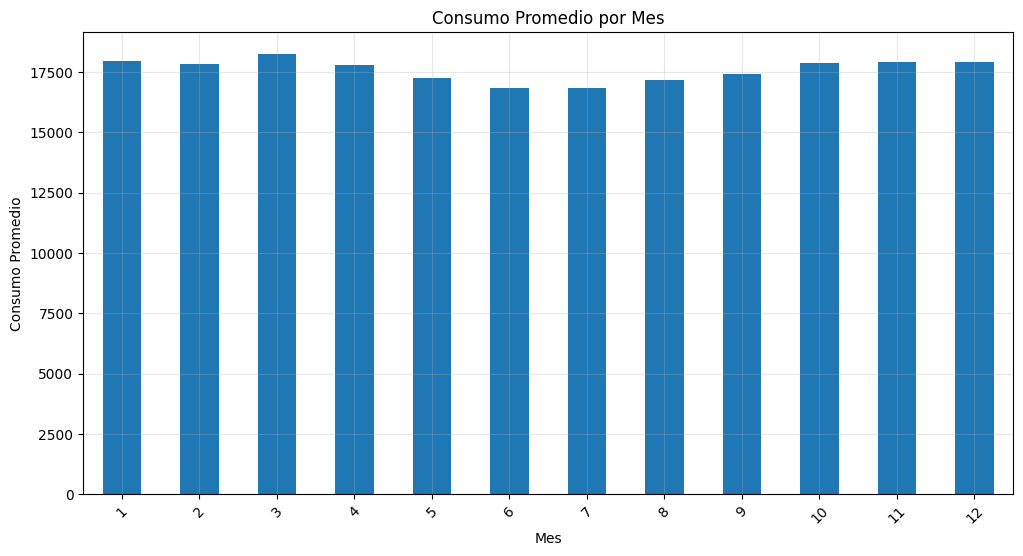

In [37]:
# Consumo promedio por mes
plt.figure(figsize=(12, 6))

# Calculamos el promedio mensual
consumo_mensual = energy_brasil.groupby('mes')['Consumo'].mean()

# Creamos el gráfico de barras
consumo_mensual.plot(kind='bar')
plt.title('Consumo Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Descripción del Consumo Promedio Mensual

- Patrón mensual: Consumo relativamente estable durante el año.
- Picos: Mayor consumo en marzo (mes 3) y octubre (mes 10).
- Valles: Menor consumo en junio-julio (meses 6-7).
- Rango: Consumo promedio varía entre 16,500 y 18,000 unidades.
- Tendencia: Ligera disminución en meses de invierno (mitad del año) y aumento en primavera/verano

# 7. Patrones

# 7.1 Patrones semanales

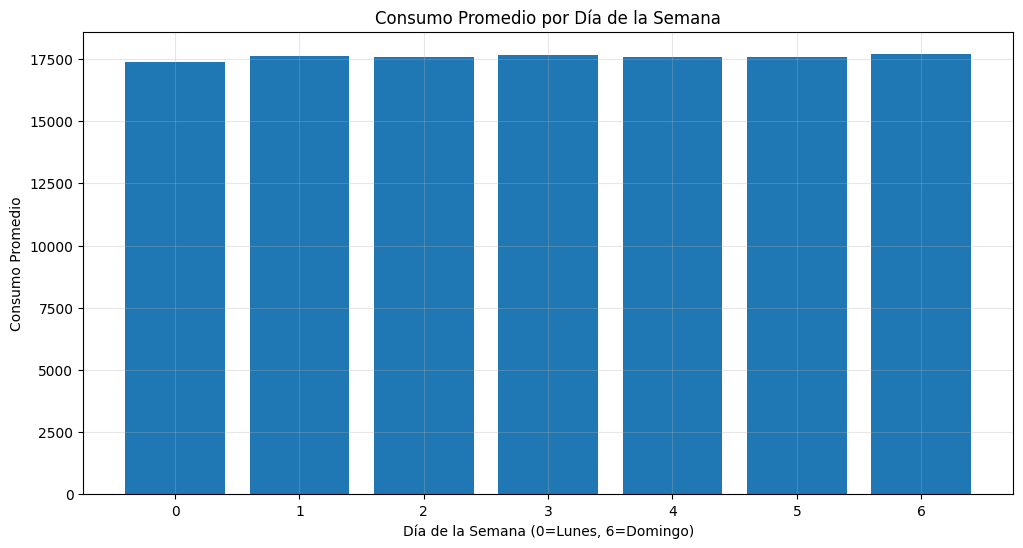

In [39]:
# Análisis de consumo por día de la semana
plt.figure(figsize=(12, 6))

# Calculamos el promedio por día de la semana
consumo_diario = energy_brasil.groupby('dia_semana')['Consumo'].mean()

# Creamos el gráfico de barras
plt.bar(consumo_diario.index, consumo_diario.values)
plt.title('Consumo Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Consumo Promedio')
plt.grid(True, alpha=0.3)
plt.show()

Descripción del Gráfico

- Distribución: Consumo muy uniforme a lo largo de la semana.
- Valores: Promedio de consumo alrededor de 17,500 unidades.
- Días:
  - 0 = Lunes.
  - 6 = Domingo.
- Patrón: No hay variaciones significativas entre días laborales y fines de semana.
- Escala: Comienza en 0 para mostrar la magnitud real del consumo.

La uniformidad sugiere que el consumo de energía es bastante estable independientemente del día de la semana.

# 7.2 Patron por Año

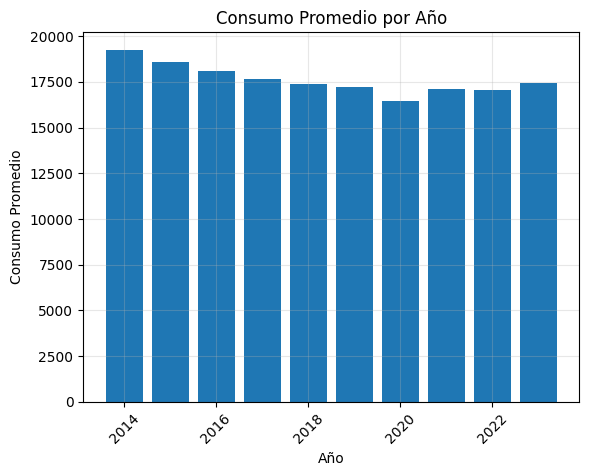

In [42]:
# Calculamos el promedio por año
consumo_anual = energy_brasil.groupby('año')['Consumo'].mean()

# Creamos el gráfico de barras
plt.bar(consumo_anual.index, consumo_anual.values)
plt.title('Consumo Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Consumo Promedio')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Conclusión 
# Análisis de Energía en Brasil
1. Análisis Temporal
- Evolución 2014-2024: Tendencia creciente en el consumo energético
- Impacto Pandemia: Caída significativa en 2020, seguida de recuperación
- Estacionalidad:
  - Picos en marzo y octubre
  - Menor consumo en junio-julio
  -Patrones anuales consistentes
2. Patrones de Consumo
  - Distribución Diaria:
    - Consumo uniforme todos los días
    - No hay diferencias significativas entre días laborales y fines de semana
    - Promedio de 17,500 unidades diarias
  - Variación Mensual:
    - Mayor consumo en meses cálidos
    - Menor consumo en invierno
    - Rango entre 16,500 y 18,000 unidades
3. Relación Consumidores-Consumo
    - Correlación: Moderada positiva (0.4)
    - Distribución:
      - Mayoría de consumidores pequeños
      - Algunos consumidores muy grandes (outliers)
      - Consumo proporcional al tamaño del consumidor
4. Implicaciones y Recomendaciones
    - Planificación Energética:
      - Prever mayor demanda en meses cálidos
      - Mantener capacidad constante durante la semana
      - Considerar crecimiento gradual anual
    - Optimización:
      - Enfoque en períodos de alto consumo
      - Atención a grandes consumidores
      - Estrategias para equilibrar demanda estacional
5. Aspectos Destacables
    - Sistema de distribución robusto y estable
    - Patrones predecibles útiles para planificación
    - Recuperación post-pandemia efectiva
    - Oportunidades de mejora en eficiencia energética

Esta información es fundamental para la toma de decisiones en el sector energético brasileño, permitiendo una mejor gestión y planificación del recurso.